# Independent Sample T-Test

### Compare Mean of Two Independent Samples with Associated Population Means
*Since we are using mock data in a normal distribution, we would expect the means of the sample and population to be equal.*

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, norm

In [74]:
# create mock independent sample data (credit scores)
sample_a = norm.rvs( # creates random variables in a normal distribution
    loc = 500, # loc = mean
    scale = 100, # scale = standard deviation
    size = 250
).astype(int) # whole numbers

sample_b = norm.rvs( # creates random variables in a normal distribution
    loc = 550,
    scale = 150,
    size = 100
).astype(int) # whole numbers

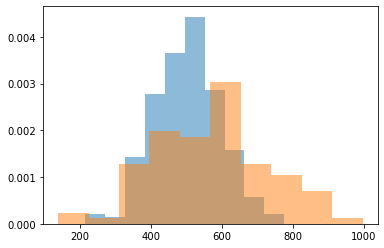

In [75]:
# plot histograms for population and sample
plt.hist(sample_a, density = True, alpha = 0.5) # density = proportional frequency
plt.hist(sample_b, density = True, alpha = 0.5)
plt.show()

In [76]:
# calculate sample means and variances for initial comparison
sample_a_mean = sample_a.mean()
sample_b_mean = sample_b.mean()
print(f'Sample A Mean: {sample_a_mean}')
print(f'Sample B Mean: {sample_b_mean}\n')

sample_a_var = sample_a.var()
sample_b_var = sample_b.var()
print(f'Sample A Variance: {round(sample_a_var, 4)}')
print(f'Sample B Variance: {round(sample_b_var, 4)}')

Sample A Mean: 500.836
Sample B Mean: 569.6

Sample A Variance: 8741.4811
Sample B Variance: 24822.76


In [77]:
# set null and alternate hypothesis, and acceptance criteria
H_o = 'The mean of Sample A is equal to the mean of Sample B.' # null
H_a = 'The mean of Sample A is NOT equal to the mean of Sample B.' # alternate
acceptance_criteria = 0.05

print(f'Null Hypothesis: {H_o}')
print(f'Alternate Hypothesis: {H_a} \n')
print(f'Acceptance Criteria: {acceptance_criteria}')

Null Hypothesis: The mean of Sample A is equal to the mean of Sample B.
Alternate Hypothesis: The mean of Sample A is NOT equal to the mean of Sample B. 

Acceptance Criteria: 0.05


In [78]:
# execute the hypothesis test
t_stat, p_value = ttest_ind(sample_a, sample_b)

print(f'p_value: {round(p_value, 4)}')
print(f'T-Statistic: {round(t_stat, 4)}')

p_value: 0.0
T-Statistic: -5.0181


In [79]:
# print results (using p-value)
if p_value <= acceptance_criteria:
    print(f'''As our p-value of {round(p_value, 4)} is lower than our acceptance criteria of {acceptance_criteria}, we reject the null hypothesis, and conclude that: 
    {H_a}
    ''')
else:
    print(f'''As our p-value of {round(p_value, 4)} is higher than our acceptance criteria of {acceptance_criteria}, we accept the null hypothesis, and conclude that: 
    {H_o}
    ''')

As our p-value of 0.0 is lower than our acceptance criteria of 0.05, we reject the null hypothesis, and conclude that: 
    The mean of Sample A is NOT equal to the mean of Sample B.
    


**The Independent Sample T-Test assumes that the two populations WILL have distributions with equal variance.**

**Welch's T-Test is a more reliable test for the Independent Samples T-Test whenever sample sizes and variances are UNEQUAL between groups, and gives the same result as the regular Independent Sample T-Test when sample sizes and variances are equal.**

#### ***We should default to the Welch's Independent Sample T-Test***


In [80]:
# execute the welch's hypothesis test
welch_t_stat, welch_p_value = ttest_ind(sample_a, sample_b, equal_var = False) # equal_var = False applied welch test

print(f'Welch\'s p_value: {round(welch_p_value, 4)}')
print(f'Welch\'s T-Statistic: {round(welch_t_stat, 4)}')

Welch's p_value: 0.0001
Welch's T-Statistic: -4.0672


In [81]:
# print results (using p-value and welch test)
if p_value <= acceptance_criteria:
    print(f'''As our p-value of {round(welch_p_value, 4)} is lower than our acceptance criteria of {acceptance_criteria}, we reject the null hypothesis, and conclude that: 
    {H_a}
    ''')
else:
    print(f'''As our p-value of {round(welchp_value, 4)} is higher than our acceptance criteria of {acceptance_criteria}, we accept the null hypothesis, and conclude that: 
    {H_o}
    ''')

As our p-value of 0.0001 is lower than our acceptance criteria of 0.05, we reject the null hypothesis, and conclude that: 
    The mean of Sample A is NOT equal to the mean of Sample B.
    
